In [1]:
# Cell 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: display settings
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")

In [2]:
# Example column structure
columns = [
    # Basic time and product info
    "year",                 # e.g., 2021, 2022, 2023
    "month",                # 1-12, or None if annual
    "product_line",         # e.g., Bars, Sandwiches, Poppables, Mochi
    "region",               # e.g., Northeast, Midwest, South, West
    # Financial metrics
    "units_sold",           # Units sold in period
    "revenue_usd",          # Total revenue
    "cost_usd",             # Total cost of goods sold
    "profit_usd",           # revenue_usd - cost_usd
    "profit_margin_pct",    # profit_usd / revenue_usd * 100
    # Demographics – could be aggregated counts or proportions
    "age_group",            # e.g., 18-24, 25-34, 35-44, 45+
    "gender",               # e.g., Male, Female, Other
    "income_bracket",       # e.g., <40k, 40-80k, 80-120k, 120k+
    # Optional extras
    "promo_flag",           # 1 if product was under promotion
]

In [3]:
np.random.seed(42)

# Example: yearly summary for 2021-2023 across product lines and regions
years = [2021, 2022, 2023]
product_lines = ["Bars", "Sandwiches", "Poppables", "Mochi"]
regions = ["Northeast", "Midwest", "South", "West"]
age_groups = ["18-24", "25-34", "35-44", "45+"]
genders = ["Male", "Female", "Other"]
income_brackets = ["<40k", "40-80k", "80-120k", "120k+"]

rows = []
for year in years:
    for product in product_lines:
        for region in regions:
            for age in age_groups:
                for gender in genders:
                    for income in income_brackets:
                        # synthetic volumes and financials
                        units = np.random.poisson(lam=500)  # arbitrary baseline
                        # adjust scale by year and product to mimic growth
                        growth_factor = 1 + 0.2*(year-2021)  # ~20% per year growth
                        units = int(units * growth_factor)
                        price_per_unit = np.random.uniform(2.0, 4.0)  # $2-$4
                        revenue = units * price_per_unit
                        cost_per_unit = price_per_unit * np.random.uniform(0.5, 0.7)  # 50-70% of price
                        cost = units * cost_per_unit
                        profit = revenue - cost
                        margin_pct = (profit / revenue) * 100 if revenue > 0 else 0
                        rows.append([
                            year, None, product, region,
                            units, revenue, cost, profit, margin_pct,
                            age, gender, income, 0
                        ])

df = pd.DataFrame(rows, columns=columns)
df.head()

,year,month,product_line,region,units_sold,revenue_usd,cost_usd,profit_usd,profit_margin_pct,age_group,gender,income_bracket,promo_flag
0,2021,None,Bars,Northeast,492,1704.282039,1056.197600,648.084439,38.026830,18-24,Male,<40k,0
1,2021,None,Bars,Northeast,474,1003.063264,675.297527,327.765738,32.676477,18-24,Male,40-80k,0
2,2021,None,Bars,Northeast,506,1032.831508,716.766445,316.065063,30.601803,18-24,Male,80-120k,0
3,2021,None,Bars,Northeast,524,1238.552566,664.707508,573.845058,46.331910,18-24,Male,120k+,0
4,2021,None,Bars,Northeast,487,1394.714448,778.593522,616.120926,44.175417,18-24,Female,<40k,0


In [4]:
# Are there any missing values?
print(df.isnull().sum())

# Check summaries for 2023
df[df['year']==2023].describe(include='all')

year                    0
month                2304
product_line            0
region                  0
units_sold              0
revenue_usd             0
cost_usd                0
profit_usd              0
profit_margin_pct       0
age_group               0
gender                  0
income_bracket          0
promo_flag              0
dtype: int64


,year,month,product_line,region,units_sold,revenue_usd,cost_usd,profit_usd,profit_margin_pct,age_group,gender,income_bracket,promo_flag
count,768.0,0,768,768,768.000000,768.000000,768.000000,768.000000,768.000000,768,768,768,768.0
unique,NaN,0,4,4,NaN,NaN,NaN,NaN,NaN,4,3,4,NaN
top,NaN,NaN,Bars,Northeast,NaN,NaN,NaN,NaN,NaN,18-24,Male,<40k,NaN
freq,NaN,NaN,192,192,NaN,NaN,NaN,NaN,NaN,192,256,192,NaN
mean,2023.0,NaN,NaN,NaN,699.287760,2088.421667,1245.204804,843.216863,40.304323,NaN,NaN,NaN,0.0
std,0.0,NaN,NaN,NaN,30.640052,406.516415,263.075200,209.378243,5.645917,NaN,NaN,NaN,0.0
min,2023.0,NaN,NaN,NaN,603.000000,1244.390183,660.259292,426.367898,30.021906,NaN,NaN,NaN,0.0
25%,2023.0,NaN,NaN,NaN,679.000000,1736.138790,1042.507772,680.717578,35.506717,NaN,NaN,NaN,0.0
50%,2023.0,NaN,NaN,NaN,698.000000,2075.702386,1232.847080,822.258651,40.589700,NaN,NaN,NaN,0.0
75%,2023.0,NaN,NaN,NaN,721.000000,2420.731077,1437.236416,986.376252,45.074021,NaN,NaN,NaN,0.0


In [5]:
agg = (
    df
    .groupby(["year", "product_line"])
    .agg(
        total_units=("units_sold", "sum"),
        total_revenue=("revenue_usd", "sum"),
        total_cost=("cost_usd", "sum"),
        total_profit=("profit_usd", "sum"),
    )
    .reset_index()
)

agg["profit_margin_pct"] = (
    agg["total_profit"] / agg["total_revenue"] * 100
)

agg

,year,product_line,total_units,total_revenue,total_cost,total_profit,profit_margin_pct
0,2021,Bars,95632,282199.374502,170727.546806,111471.827696,39.501090
1,2021,Mochi,96166,285712.456075,170227.410448,115485.045627,40.420025
2,2021,Poppables,95888,284581.266530,170080.770244,114500.496286,40.234727
3,2021,Sandwiches,96444,283315.641254,170220.650350,113094.990905,39.918372
4,2022,Bars,115605,350832.046734,207619.913768,143212.132966,40.820710
5,2022,Mochi,115494,339528.809962,203713.746378,135815.063585,40.001043
6,2022,Poppables,114816,348786.384920,207426.083574,141360.301346,40.529191
7,2022,Sandwiches,114784,342016.906839,204956.155748,137060.751091,40.074262
8,2023,Bars,134318,408917.867491,242119.404238,166798.463253,40.790212
9,2023,Mochi,134206,406427.986116,244224.568184,162203.417932,39.909510


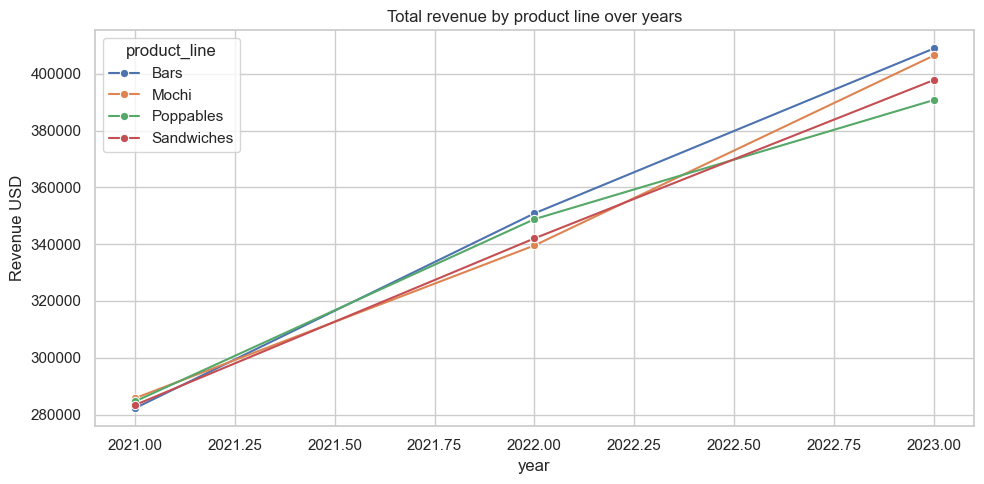

In [6]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=agg,
    x="year",
    y="total_revenue",
    hue="product_line",
    marker="o"
)
plt.title("Total revenue by product line over years")
plt.ylabel("Revenue USD")
plt.tight_layout()
plt.show()

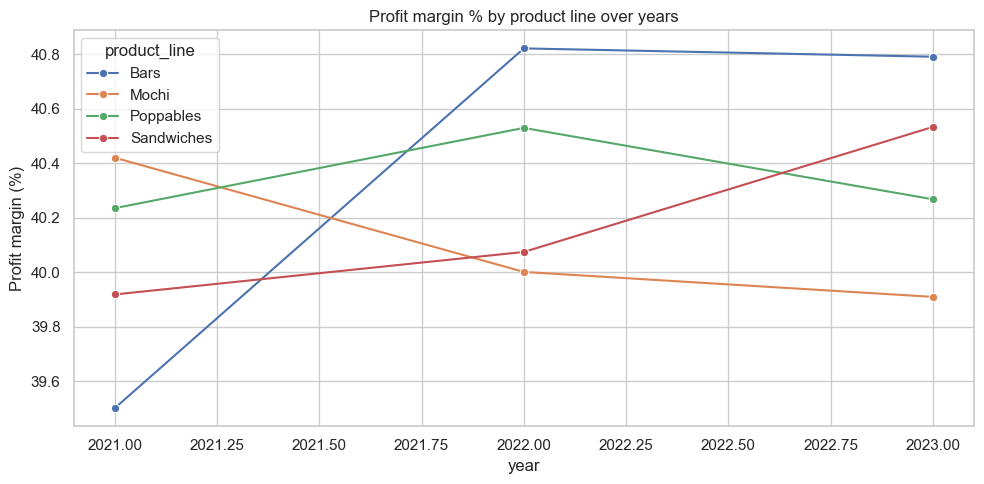

In [7]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=agg,
    x="year",
    y="profit_margin_pct",
    hue="product_line",
    marker="o"
)
plt.title("Profit margin % by product line over years")
plt.ylabel("Profit margin (%)")
plt.tight_layout()
plt.show()

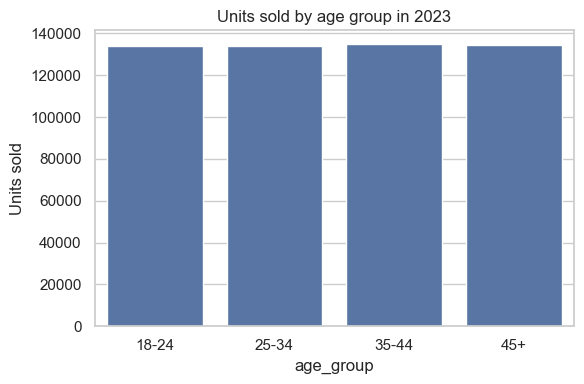

In [8]:
# Summarize units by age for 2023
age_dist = (
    df[df['year']==2023]
    .groupby("age_group")["units_sold"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(6,4))
sns.barplot(data=age_dist, x="age_group", y="units_sold")
plt.title("Units sold by age group in 2023")
plt.ylabel("Units sold")
plt.tight_layout()
plt.show()

In [9]:
# Save synthetic dataset
df.to_csv("yasso_sales_demo_dataset.csv", index=False)

# Save aggregated summaries
agg.to_csv("yasso_sales_agg_by_product_year.csv", index=False)